### Semantic Textual Similarity

For Semantic Textual Similarity (STS), we want to produce embeddings for all texts involved and calculate the similarities between them. The text pairs with the highest similarity score are most semantically similar. See also the Computing Embeddings documentation for more advanced details on getting embedding scores.

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

In [4]:
embeddings = model.encode(sentences)
print(embeddings.shape)

(3, 384)


In [5]:
similarities = model.similarity(embeddings, embeddings)
print(similarities)

tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])


In [6]:
model = SentenceTransformer("all-mpnet-base-v2", device="mps")


In [8]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

# Two lists of sentences
sentences1 = ["HANAN ATHER TRUCKING"] 

sentences2 = [
  "HANAN TAHER TRUCKING",
    "TRUCKING INC HANAN ATHER",
    "ATHER TRUCKING INC",
    "GODBOUT TRUCKING INC",
    "HANAN ATHER PHARMACY INC",
    "Ather INC"
]

# Compute embeddings for both lists
embeddings1 = model.encode(sentences1)
embeddings2 = model.encode(sentences2)

# Compute cosine similarities
similarities = model.similarity(embeddings1, embeddings2)

# Output the pairs with their score
for idx_i, sentence1 in enumerate(sentences1):
    print(sentence1)
    for idx_j, sentence2 in enumerate(sentences2):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

HANAN ATHER TRUCKING
 - HANAN TAHER TRUCKING          : 0.9291
 - TRUCKING INC HANAN ATHER      : 0.8752
 - ATHER TRUCKING INC            : 0.6428
 - GODBOUT TRUCKING INC          : 0.4652
 - HANAN ATHER PHARMACY INC      : 0.5612
 - Ather INC                     : 0.3572


### Similarity Calculation


The similarity metric that is used is stored in the SentenceTransformer instance under `SentenceTransformer.similarity_fn_name.` Valid options are:
- SimilarityFunction.COSINE (a.k.a “cosine”): Cosine Similarity (default)

- SimilarityFunction.DOT_PRODUCT (a.k.a “dot”): Dot Product

- SimilarityFunction.EUCLIDEAN (a.k.a “euclidean”): Negative Euclidean Distance

- SimilarityFunction.MANHATTAN (a.k.a. “manhattan”): Negative Manhattan Distance

This value can be changed in a handful of ways:

By initializing the SentenceTransformer instance with the desired similarity function:

In [19]:
from sentence_transformers import SentenceTransformer, SimilarityFunction

model1 = SentenceTransformer("all-MiniLM-L6-v2", similarity_fn_name=SimilarityFunction.DOT_PRODUCT)
model2 = SentenceTransformer("all-MiniLM-L6-v2", similarity_fn_name=SimilarityFunction.COSINE)
model3 = SentenceTransformer("all-MiniLM-L6-v2", similarity_fn_name=SimilarityFunction.EUCLIDEAN)
model4 = SentenceTransformer("all-MiniLM-L6-v2", similarity_fn_name=SimilarityFunction.MANHATTAN)

# By setting the value directly on the SentenceTransformer instance:

from sentence_transformers import SentenceTransformer, SimilarityFunction
model = SentenceTransformer("all-MiniLM-L6-v2")
model.similarity_fn_name = SimilarityFunction.DOT_PRODUCT

In [20]:
# Two lists of Business names 
businesNames1 = ["HANAN ATHER TRUCKING"] 

businesNames2 = [
  "HANAN TAHER TRUCKING",
    "TRUCKING INC HANAN ATHER",
    "ATHER TRUCKING INC",
    "GODBOUT TRUCKING INC",
    "HANAN ATHER PHARMACY INC",
    "Ather INC"
]


In [21]:
# Compute embeddings for both lists
embeddings1 = model1.encode(businesNames1)
embeddings2 = model1.encode(businesNames2)

# Compute cosine similarities
similarities = model1.similarity(embeddings1, embeddings2)

# Output the pairs with their score
for idx_i, sentence1 in enumerate(sentences1):
    print(sentence1)
    for idx_j, sentence2 in enumerate(sentences2):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

HANAN ATHER TRUCKING
 - HANAN TAHER TRUCKING          : 0.9291
 - TRUCKING INC HANAN ATHER      : 0.8752
 - ATHER TRUCKING INC            : 0.6428
 - GODBOUT TRUCKING INC          : 0.4652
 - HANAN ATHER PHARMACY INC      : 0.5612
 - Ather INC                     : 0.3572


In [22]:
# Compute embeddings for both lists
embeddings1 = model2.encode(businesNames1)
embeddings2 = model2.encode(businesNames2)

# Compute cosine similarities
similarities = model2.similarity(embeddings1, embeddings2)

# Output the pairs with their score
for idx_i, sentence1 in enumerate(sentences1):
    print(sentence1)
    for idx_j, sentence2 in enumerate(sentences2):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

HANAN ATHER TRUCKING
 - HANAN TAHER TRUCKING          : 0.9291
 - TRUCKING INC HANAN ATHER      : 0.8752
 - ATHER TRUCKING INC            : 0.6428
 - GODBOUT TRUCKING INC          : 0.4652
 - HANAN ATHER PHARMACY INC      : 0.5612
 - Ather INC                     : 0.3572


In [23]:
# Compute embeddings for both lists
embeddings1 = model3.encode(businesNames1)
embeddings2 = model3.encode(businesNames2)

# Compute cosine similarities
similarities = model3.similarity(embeddings1, embeddings2)

# Output the pairs with their score
for idx_i, sentence1 in enumerate(sentences1):
    print(sentence1)
    for idx_j, sentence2 in enumerate(sentences2):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

HANAN ATHER TRUCKING
 - HANAN TAHER TRUCKING          : -0.3765
 - TRUCKING INC HANAN ATHER      : -0.4996
 - ATHER TRUCKING INC            : -0.8452
 - GODBOUT TRUCKING INC          : -1.0342
 - HANAN ATHER PHARMACY INC      : -0.9368
 - Ather INC                     : -1.1338


In [15]:
from sentence_transformers import SentenceTransformer, util, SimilarityFunction
import pandas as pd
import torch

# Lists of business names
businessNames1 = ["HANAN ATHER TRUCKING"]
businessNames2 = [
    "HANAN TAHER TRUCKING",
    "TRUCKING INC HANAN ATHER",
    "ATHER TRUCKING INC",
    "GODBOUT TRUCKING INC",
    "HANAN ATHER PHARMACY INC",
    "Ather INC"
]

# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Compute embeddings
embeddings1 = model.encode(businessNames1)
embeddings2 = model.encode(businessNames2)

# Helper function to calculate similarities and create DataFrame
def calculate_similarities(embeddings1, embeddings2, similarity_fn, metric_name):
    if similarity_fn == SimilarityFunction.COSINE:
        similarities = util.pytorch_cos_sim(embeddings1, embeddings2)
    elif similarity_fn == SimilarityFunction.DOT_PRODUCT:
        similarities = torch.matmul(torch.tensor(embeddings1), torch.tensor(embeddings2).T)
    elif similarity_fn == SimilarityFunction.EUCLIDEAN:
        similarities = -torch.cdist(torch.tensor(embeddings1), torch.tensor(embeddings2), p=2)
    elif similarity_fn == SimilarityFunction.MANHATTAN:
        similarities = -torch.cdist(torch.tensor(embeddings1), torch.tensor(embeddings2), p=1)

    data = {
        'Business Name 1': [],
        'Business Name 2': [],
        'Similarity Score': [],
        'Similarity Metric': []
    }

    for idx_i, name1 in enumerate(businessNames1):
        for idx_j, name2 in enumerate(businessNames2):
            data['Business Name 1'].append(name1)
            data['Business Name 2'].append(name2)
            data['Similarity Score'].append(similarities[idx_i][idx_j].item())
            data['Similarity Metric'].append(metric_name)

    return pd.DataFrame(data)

# Calculate similarities for each metric
similarity_metrics = {
    'Cosine': SimilarityFunction.COSINE,
    'Dot Product': SimilarityFunction.DOT_PRODUCT,
    'Euclidean': SimilarityFunction.EUCLIDEAN,
    'Manhattan': SimilarityFunction.MANHATTAN
}

all_results = pd.DataFrame()
for metric_name, similarity_fn in similarity_metrics.items():
    df = calculate_similarities(embeddings1, embeddings2, similarity_fn, metric_name)
    all_results = pd.concat([all_results, df], ignore_index=True)

# Display the combined table
print(all_results)


         Business Name 1           Business Name 2  Similarity Score  \
0   HANAN ATHER TRUCKING      HANAN TAHER TRUCKING          0.929135   
1   HANAN ATHER TRUCKING  TRUCKING INC HANAN ATHER          0.875217   
2   HANAN ATHER TRUCKING        ATHER TRUCKING INC          0.642829   
3   HANAN ATHER TRUCKING      GODBOUT TRUCKING INC          0.465248   
4   HANAN ATHER TRUCKING  HANAN ATHER PHARMACY INC          0.561208   
5   HANAN ATHER TRUCKING                 Ather INC          0.357233   
6   HANAN ATHER TRUCKING      HANAN TAHER TRUCKING          0.929135   
7   HANAN ATHER TRUCKING  TRUCKING INC HANAN ATHER          0.875217   
8   HANAN ATHER TRUCKING        ATHER TRUCKING INC          0.642829   
9   HANAN ATHER TRUCKING      GODBOUT TRUCKING INC          0.465248   
10  HANAN ATHER TRUCKING  HANAN ATHER PHARMACY INC          0.561207   
11  HANAN ATHER TRUCKING                 Ather INC          0.357233   
12  HANAN ATHER TRUCKING      HANAN TAHER TRUCKING         -0.37

In [18]:
from sentence_transformers import SentenceTransformer, SimilarityFunction, util
import pandas as pd
import torch

# Lists of business names
businessNames1 = ["HANAN ATHER TRUCKING"]
businessNames2 = [
    "HANAN TAHER TRUCKING",
    "TRUCKING INC HANAN ATHER",
    "ATHER TRUCKING INC",
    "GODBOUT TRUCKING INC",
    "HANAN ATHER PHARMACY INC",
    "Ather INC"
]

# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Compute embeddings
embeddings1 = model.encode(businessNames1)
embeddings2 = model.encode(businessNames2)

# Helper function to calculate similarities manually
def calculate_similarities_manual(embeddings1, embeddings2, similarity_fn):
    if similarity_fn == SimilarityFunction.COSINE:
        similarities = util.pytorch_cos_sim(embeddings1, embeddings2)
    elif similarity_fn == SimilarityFunction.DOT_PRODUCT:
        similarities = torch.matmul(torch.tensor(embeddings1), torch.tensor(embeddings2).T)
    elif similarity_fn == SimilarityFunction.EUCLIDEAN:
        similarities = -torch.cdist(torch.tensor(embeddings1), torch.tensor(embeddings2), p=2)
    elif similarity_fn == SimilarityFunction.MANHATTAN:
        similarities = -torch.cdist(torch.tensor(embeddings1), torch.tensor(embeddings2), p=1)
    
    return similarities

# Initialize the DataFrame
data = {
    'Business Name 1': [],
    'Business Name 2': []
}

# Fill in business name pairs
for name1 in businessNames1:
    for name2 in businessNames2:
        data['Business Name 1'].append(name1)
        data['Business Name 2'].append(name2)

# Calculate similarities for each metric
similarity_metrics = {
    'Cosine': SimilarityFunction.COSINE,
    'Dot Product': SimilarityFunction.DOT_PRODUCT,
    'Euclidean': SimilarityFunction.EUCLIDEAN,
    'Manhattan': SimilarityFunction.MANHATTAN
}

# Compute similarities and add to DataFrame
for metric_name, similarity_fn in similarity_metrics.items():
    similarities = calculate_similarities_manual(embeddings1, embeddings2, similarity_fn)
    data[metric_name] = [similarities[idx_i][idx_j].item() for idx_i in range(len(businessNames1)) for idx_j in range(len(businessNames2))]

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Business Name 1,Business Name 2,Cosine,Dot Product,Euclidean,Manhattan
0,HANAN ATHER TRUCKING,HANAN TAHER TRUCKING,0.929135,0.929135,-0.376471,-5.891263
1,HANAN ATHER TRUCKING,TRUCKING INC HANAN ATHER,0.875217,0.875217,-0.499567,-7.696542
2,HANAN ATHER TRUCKING,ATHER TRUCKING INC,0.642829,0.642829,-0.845187,-13.315373
3,HANAN ATHER TRUCKING,GODBOUT TRUCKING INC,0.465248,0.465248,-1.034168,-16.336832
4,HANAN ATHER TRUCKING,HANAN ATHER PHARMACY INC,0.561208,0.561207,-0.936795,-14.436736
5,HANAN ATHER TRUCKING,Ather INC,0.357233,0.357233,-1.133814,-18.055639


SyntaxError: invalid syntax (2882770609.py, line 1)

In [54]:
# quick G&C loading:
# source: https://search.open.canada.ca/grants/
data = pd.read_csv('grants.csv')

/var/folders/ry/1ct1kks556s6ffsdyjq1grdh0000gn/T/ipykernel_51950/2875053231.py:3: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('grants.csv')


In [31]:
data.shape()

(100001, 40)

In [36]:
data.head()

,format,ref_number,amendment_number,amendment_date,agreement_type_en,recipient_type_en,recipient_business_number,recipient_legal_name,recipient_operating_name,research_organization_name,...,additional_information_eng,owner_org_en,agreement_value_range_en,coverage_en,has_amendments_en,format_en,recipient_city_en,fiscal_year,quarter_en,id
0,DEFAULT,2035-2018-2019Q4-00115,current,2020-03-28T00:00:00Z,Contribution,For-profit organization,830244281,Select Seafoods Canada Ltd.,-,-,...,The amendment extends the completion date by o...,Agriculture and Agri-Food Canada,"(d) $25,000 - $100,000",-,-,Grants and Contributions,Richmond,-,-,"aafc-aac,2035-2018-2019Q4-00115,current"
1,DEFAULT,235-2018-2019-Q1-00001,00,0001-01-01T00:00:00Z,Contribution,-,-,Canadian Vintners Association,-,-,...,-,Agriculture and Agri-Food Canada,"(f) $1,000,000 - $5,000,000",-,-,Grants and Contributions,Ottawa,-,-,"aafc-aac,235-2018-2019-Q1-00001,00"
2,DEFAULT,235-2018-2019-Q1-00001,01,2019-09-09T00:00:00Z,-,Not-for-profit organization or charity,123240160,-,Canadian Vintners Association,-,...,The amendment adds the presentation of a Wines...,Agriculture and Agri-Food Canada,-,-,-,Grants and Contributions,-,-,-,"aafc-aac,235-2018-2019-Q1-00001,01"
3,DEFAULT,235-2018-2019-Q1-00001,current,2019-09-09T00:00:00Z,Contribution,Not-for-profit organization or charity,123240160,Canadian Vintners Association,Canadian Vintners Association,-,...,The amendment adds the presentation of a Wines...,Agriculture and Agri-Food Canada,"(f) $1,000,000 - $5,000,000",-,-,Grants and Contributions,Ottawa,-,-,"aafc-aac,235-2018-2019-Q1-00001,current"
4,DEFAULT,235-2018-2019-Q1-00002,current,0001-01-01T00:00:00Z,Contribution,-,-,Ontario Ginseng Growers Association,-,-,...,-,Agriculture and Agri-Food Canada,"(e) $100,000 - $1,000,000",-,-,Grants and Contributions,Simcoe,-,-,"aafc-aac,235-2018-2019-Q1-00002,current"


In [39]:
data.columns


Index(['format', 'ref_number', 'amendment_number', 'amendment_date',
       'agreement_type_en', 'recipient_type_en', 'recipient_business_number',
       'recipient_legal_name', 'recipient_operating_name',
       'research_organization_name', 'recipient_country',
       'recipient_province_en', 'recipient_city', 'recipient_postal_code',
       'federal_riding_name_eng', 'federal_riding_number', 'prog_name_eng',
       'prog_purpose_eng', 'agreement_title_eng', 'agreement_number',
       'agreement_value', 'foreign_currency_type', 'foreign_currency_value',
       'agreement_start_date', 'year', 'agreement_end_date', 'coverage',
       'description_eng', 'naics_identifier', 'expected_results_eng',
       'additional_information_eng', 'owner_org_en',
       'agreement_value_range_en', 'coverage_en', 'has_amendments_en',
       'format_en', 'recipient_city_en', 'fiscal_year', 'quarter_en', 'id'],
      dtype='object')

In [40]:
data = pd.read_csv('grants.csv', usecols=['description_eng', 'recipient_legal_name'])

In [41]:
data.head()

,recipient_legal_name,description_eng
0,Select Seafoods Canada Ltd.,The objective of this project is to contribute...
1,Canadian Vintners Association,AgriMarketing Program - National Industry Asso...
2,-,The objective of this project is to increase d...
3,Canadian Vintners Association,The objective of this project is to increase d...
4,Ontario Ginseng Growers Association,AgriMarketing Program - National Industry Asso...


In [43]:
data.shape

(100001, 2)

In [44]:
data = pd.read_csv('grants.csv', usecols=['description_eng', 'recipient_legal_name'], nrows=100)

In [45]:
# Print out the descriptions in detail
for i, description in enumerate(data['description_eng']):
    print(f"Description {i+1}:\n{description}\n")

Description 1:
The objective of this project is to contribute to growth and profitability of British Columbia's fish exports by increasing the company's participation in priority markets, managing export risks and maintaining market expertise, increasing market access in existing priority markets; and growing sales in new priority markets.

Description 2:
AgriMarketing Program - National Industry Association component - help industry increase and diversify exports by supporting promotional activities that differentiate Canadian products and producers.

Description 3:
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers.

Description 4:
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, 

In [57]:
import pandas as pd

# Define the descriptions as a list to simulate reading from a CSV
# Corpus with example sentences
corpus = [
    "The objective of this project is to contribute to growth and profitability of British Columbia's fish exports by increasing the company's participation in priority markets, managing export risks and maintaining market expertise, increasing market access in existing priority markets; and growing sales in new priority markets.",
    "AgriMarketing Program - National Industry Association component - help industry increase and diversify exports by supporting promotional activities that differentiate Canadian products and producers.",
    "The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers.",
    "The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers.",
    "AgriMarketing Program - National Industry Association component - help industry increase and diversify exports by supporting promotional activities that differentiate Canadian products and producers.",
    "AgriScience Program Cluster or Project component accelerate the pace of innovation by providing funding and support for pre-commercial science activities and cutting-edge research that benefits the agriculture and agri-food sector and Canadians.",
    "AgriScience Program Cluster component accelerate the pace of innovation by providing funding and support for pre-commercial science activities and cutting-edge research that benefits the agriculture and agri-food sector and Canadians.",
    "AgriScience Program Cluster component accelerate the pace of innovation by providing funding and support for pre-commercial science activities and cutting-edge research that benefits the agriculture and agri-food sector and Canadians.",
    "Canadian Agricultural Adaptation Program (CAAP), funding to facilitate the agriculture, agri-food and agri-based products sector's ability to seize opportunities, to respond to new and emerging issues and to pathfind and pilot solutions to new and ongoing issues in order to help it adapt and remain competitive.",
    "Canada-Alberta Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-New Brunswick Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Québec Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-British Columbia Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Prince Edward Island Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Newfoundland and Labrador Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Yukon Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Northwest Territories Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Manitoba Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Nova Scotia Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Ontario Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "Canada-Saskatchewan Bilateral Agreement Implementing the Canadian Agricultural Partnership: A Federal-Provincial-Territorial Framework Agreement on Agriculture, Agri-Food and Agri-Based Products Policy",
    "The Career Focus Program helps an individual acquire experience in the agricultural sector.",
    "The Youth Green Jobs Initiatives under the Green Farms Stream of the Career Focus Program helps an individual acquire experience in the agricultural sector.",
    "The objective of this project is to increase sales internationally and domestically by increasing awareness of the availability, wide variety and quality of Canadian floriculture products; to maintain access to US markets; and to research floriculture marketing strategies.",
    "The Youth Green Jobs Initiatives under the Green Farms Stream of the Career Focus Program helps an individual acquire experience in the agricultural sector.",
    
]

# Create a DataFrame from the descriptions list
data = pd.DataFrame(descriptions, columns=['description_eng'])

# Print out the descriptions in detail
for i, description in enumerate(data['description_eng']):
    print(f"Description {i+1}:\n{description}\n")


Description 1:
The objective of this project is to contribute to growth and profitability of British Columbia's fish exports by increasing the company's participation in priority markets, managing export risks and maintaining market expertise, increasing market access in existing priority markets; and growing sales in new priority markets.

Description 2:
AgriMarketing Program - National Industry Association component - help industry increase and diversify exports by supporting promotional activities that differentiate Canadian products and producers.

Description 3:
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers.

Description 4:
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, 

In [55]:
import torch
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus with example sentences


# Use "convert_to_tensor=True" to keep the tensors on GPU (if available)
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = [
    "Methods to boost recognition and trust in premium wines",
    "Funding opportunities for pre-commercial science activities",
    "Grants for cutting-edge research in agriculture",
    "Programs to accelerate innovation in the agri-food sector",
    "Details about the Canada-Alberta Bilateral Agreement",
    "Implementing the Canadian Agricultural Partnership in various provinces",
    "Programs to help the agricultural sector adapt to new challenges",
    "Initiatives to maintain competitiveness in the agri-food sector",
]

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = torch.nn.functional.cosine_similarity(query_embedding, corpus_embeddings)
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", query)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(corpus[idx], "(Score: {:.4f})".format(score))

    """
    # Alternatively, we can also use util.semantic_search to perform cosine similarty + topk
    hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)
    hits = hits[0]      #Get the hits for the first query
    for hit in hits:
        print(corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))
    """



Query: Methods to boost recognition and trust in premium wines
Top 5 most similar sentences in corpus:
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers. (Score: 0.6211)
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers. (Score: 0.6211)
The objective of this project is to increase sales internationally and domestically by increasing awareness of the availability, wide variety and quality of Canadian floriculture products; to maintain access to US markets; and to research floriculture marketing strategies. (Score: 0.2538)
AgriMarketing Program - National Indus

In [59]:
import torch
from sentence_transformers import SentenceTransformer, util

# Initialize the sentence transformer model
embedder = SentenceTransformer("all-MiniLM-L6-v2")


# Encode the corpus
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
# Query sentences:
queries = [
    "Grants to boost recognition and trust in premium wines",
    "Funding opportunities for pre-commercial science activities",
    "Grants for cutting-edge research in agriculture",
    "Programs to accelerate innovation in the agri-food sector",
    "Details about the Canada-Alberta Bilateral Agreement",
    "Implementing the Canadian Agricultural Partnership in various provinces",
    "Programs to help the agricultural sector adapt to new challenges",
    "Initiatives to maintain competitiveness in the agri-food sector",
]

# Encode the queries
query_embeddings = embedder.encode(queries, convert_to_tensor=True)

# Perform semantic search
top_k = 5
results = util.semantic_search(query_embeddings, corpus_embeddings, top_k=top_k)

# Print the results
for query, hits in zip(queries, results):
    print("\nQuery:", query)
    print("Top 5 most similar sentences in corpus:")
    for hit in hits:
        print(f"Corpus ID: {hit['corpus_id']} (Score: {hit['score']:.4f})")
        print(corpus[hit['corpus_id']])



Query: Grants to boost recognition and trust in premium wines
Top 5 most similar sentences in corpus:
Corpus ID: 2 (Score: 0.5880)
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers.
Corpus ID: 3 (Score: 0.5880)
The objective of this project is to increase domestic and export sales of Canadian wine through market development and increased recognition, awareness and trust in Canadian premium wines and to protect, maintain and enhance market access for Canadian wine producers.
Corpus ID: 23 (Score: 0.2703)
The objective of this project is to increase sales internationally and domestically by increasing awareness of the availability, wide variety and quality of Canadian floriculture products; to maintain access to US markets; and to research floriculture marketing strategies.

## Optimized Implementation

Instead of implementing semantic search by yourself, you can use the util.semantic_search function.

## Speed Optimization
To get the optimal speed for the util.semantic_search method, it is advisable to have the query_embeddings as well as the corpus_embeddings on the same GPU-device. This significantly boost the performance. Further, we can normalize the corpus embeddings so that each corpus embeddings is of length 1. In that case, we can use dot-product for computing scores.


In [ ]:
corpus_embeddings = corpus_embeddings.to("cuda")
corpus_embeddings = util.normalize_embeddings(corpus_embeddings)

query_embeddings = query_embeddings.to("cuda")
query_embeddings = util.normalize_embeddings(query_embeddings)
hits = util.semantic_search(query_embeddings, corpus_embeddings, score_function=util.dot_score)

##  Elasticsearch & Approximate Nearest Neighbor
Elasticsearch has the possibility to index dense vectors and to use them for document scoring. We can easily index embedding vectors, store other data alongside our vectors and, most importantly, efficiently retrieve relevant entries using approximate nearest neighbor search (HNSW, see also below) on the embeddings.

- Searching a large corpus with millions of embeddings can be time-consuming if exact nearest neighbor search is used (like it is used by util.semantic_search).

In that case, Approximate Nearest Neighbor (ANN) can be helpful. Here, the data is partitioned into smaller fractions of similar embeddings. This index can be searched efficiently and the embeddings with the highest similarity (the nearest neighbors) can be retrieved within milliseconds, even if you have millions of vectors. However, the results are not necessarily exact. It is possible that some vectors with high similarity will be missed.

For all ANN methods, there are usually one or more parameters to tune that determine the recall-speed trade-off. If you want the highest speed, you have a high chance of missing hits. If you want high recall, the search speed decreases.

Three popular libraries for approximate nearest neighbor are Annoy, FAISS, and hnswlib.

### Retrieve & Re-Rank

For complex semantic search scenarios, a two-stage retrieve & re-rank pipeline is advisable:
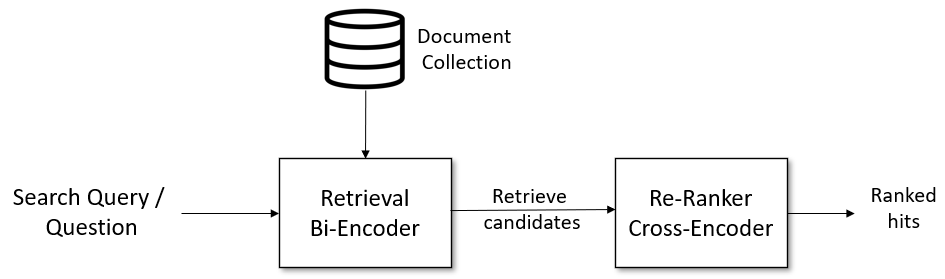

Given a search query, we first use a retrieval system that retrieves a large list of e.g. 100 possible hits which are potentially relevant for the query. For the retrieval, we can use either lexical search, e.g. with a vector engine like Elasticsearch, or we can use dense retrieval with a bi-encoder. However, the retrieval system might retrieve documents that are not that relevant for the search query. Hence, in a second stage, we use a re-ranker based on a cross-encoder that scores the relevancy of all candidates for the given search query. The output will be a ranked list of hits we can present to the user.

